## Atividade: Perceptron - Petróleo 
### INSTITUTO FEDERAL DE MINAS GERAIS Departamento de de Engenharia e Computação 
Professor: Ciniro Nametala<br>
Aluno: César Nogueira Rodrigues

In [63]:
# Importando Bibliotecas 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygwalker as pyg
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import plotly.graph_objects as go

In [64]:
def degrau_bipolar(u):
   if u >= 0:
      return 1
   return -1

def previsao(w, x):
   u = np.dot(w.T, x)
   ŷ = degrau_bipolar(u)
   return ŷ

In [65]:
dados = pd.read_csv('tabela_treino.csv', sep=';')

n_variaveis = dados.shape[1] - 2

n_amostras = dados.shape[0]
print(f"Número de amostras: {n_amostras}")

x = dados.iloc[:, 1:n_variaveis + 1].values
dados['x1'] = pd.to_numeric(dados['x1'], errors='coerce')
dados['x2'] = pd.to_numeric(dados['x2'], errors='coerce')
dados['x3'] = pd.to_numeric(dados['x3'], errors='coerce')
dados['y'] = pd.to_numeric(dados['d'], errors='coerce')

dados.head()

Número de amostras: 30


,Amostra,x1,x2,x3,d,y
0,1,-0.6508,0.1097,4.0009,-1.0,-1.0
1,2,-1.4492,0.8896,4.4005,-1.0,-1.0
2,3,2.0850,0.6876,7.9845,-1.0,-1.0
3,4,0.2626,1.1476,12.0710,-1.0,-1.0
4,5,0.6418,1.0234,7.7985,1.0,1.0


In [66]:
bias = np.ones((n_amostras, 1)) * -1
x = np.hstack((x, bias))

In [67]:
y = dados.iloc[:, 5].values

print(f"-1 Esperados: {(y == -1).sum()}")
print(f"1 Esperados: {(y == 1).sum()}")

-1 Esperados: 16
1 Esperados: 14


In [68]:
quantRoda = 5
pesosAntes = []
pesosDepois = []
for i in range(quantRoda):
   w = np.random.uniform(-1, 1, n_variaveis + 1)
   pesosAntes.append(w.copy())

   eta = 0.01
   tolerancia = 0.01
   erro_medio = tolerancia + 1
   erro_epocas = []
   epoca = 0
   max_epocas = 1000

   criterio_erro = True
   criterio_epoca = True

   while(criterio_epoca and criterio_erro):
      erro_atual = 0
      epoca = epoca + 1
      indices_embaralhados = np.random.permutation(n_amostras)

      for i in range(n_amostras):
         indice_amostra = indices_embaralhados[i]
         xi_amostra = x[indice_amostra, :]
         u = np.dot(w.T, xi_amostra)
         yhat = degrau_bipolar(u)
         e = y[indice_amostra] - yhat
         w = w + ((eta * e) * xi_amostra)
         erro_atual = erro_atual + np.abs(e)
         
      erro_medio = erro_atual/n_amostras
      erro_epocas.append(erro_medio)
      
      if erro_medio <= tolerancia:
         criterio_erro = False

      if epoca >= max_epocas:
         criterio_epoca = False

   pesosDepois.append(w.copy())

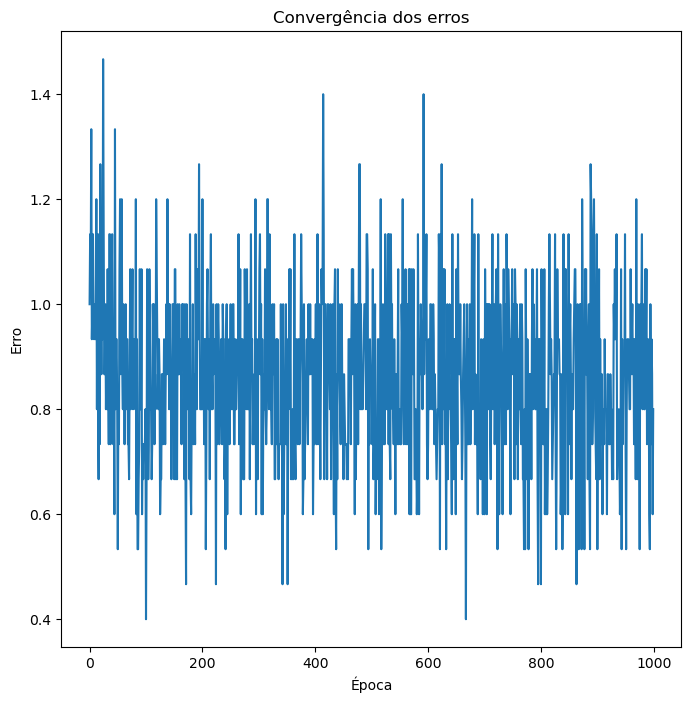

In [69]:
plt.figure(figsize=(8, 8))
plt.plot(erro_epocas[:max_epocas])
plt.title("Convergência dos erros")
plt.xlabel("Época")
plt.ylabel("Erro")
plt.show()

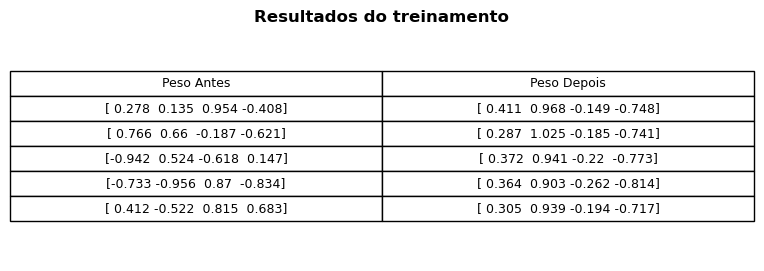

In [70]:
col_labels = ["Peso Antes", "Peso Depois"]
table_data = [[np.round(pesosAntes[i], 3), np.round(pesosDepois[i], 3)] for i in range(quantRoda)]

fig, ax = plt.subplots(figsize=(8, 3))
ax.axis("off")
table = ax.table(
    cellText=table_data,
    colLabels=col_labels,
    loc="center",
    cellLoc="center",
)

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

plt.title("Resultados do treinamento", fontsize=12, weight="bold")
plt.show()

In [71]:
ŷ = np.zeros(n_amostras)
ŷ_list = []

for j in range(quantRoda):
   for i in range(n_amostras):
      ŷ[i] = previsao(pesosDepois[j], x[i, :])

   ŷ_list.append(ŷ)
   ŷ = np.zeros(n_amostras)
   
ŷ_list = np.array(ŷ_list)

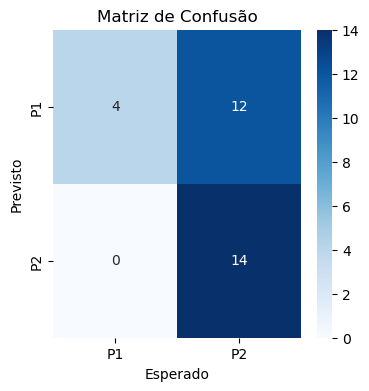

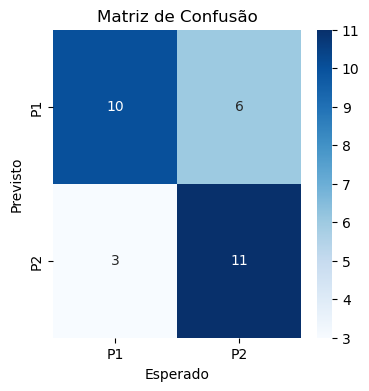

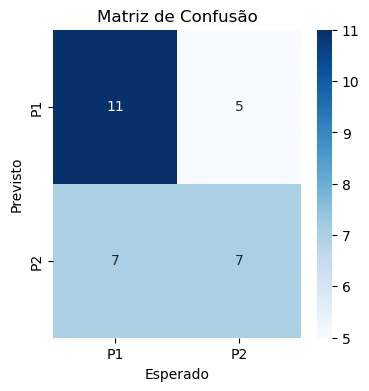

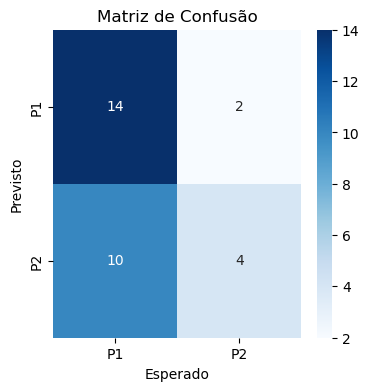

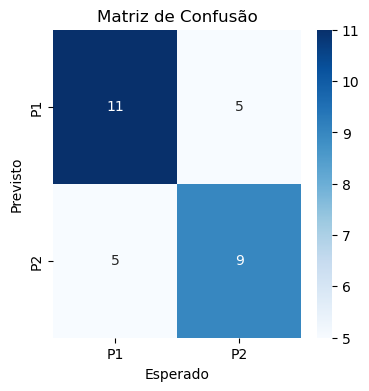

In [72]:
ŷ_display = np.where(ŷ_list == -1,0, ŷ_list)
y_display = np.where(y == -1,0, y)

for i in range(quantRoda):
   cm = confusion_matrix(y_display, ŷ_display[i])

   plt.figure(figsize=(4,4))
   sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['P1', 'P2'], yticklabels=['P1', 'P2'])

   plt.title('Matriz de Confusão')
   plt.xlabel('Esperado')
   plt.ylabel('Previsto')
   plt.show()

## Previsão com tabela de classificação


In [73]:
dados = pd.read_csv('tabela_classificacao.csv', sep=';')

n_variaveis = dados.shape[1]

n_amostras = dados.shape[0]
print(f"Número de amostras: {n_amostras}")

x = dados.iloc[:, 0:n_variaveis].values
dados['x1'] = pd.to_numeric(dados['x1'], errors='coerce')
dados['x2'] = pd.to_numeric(dados['x2'], errors='coerce')
dados['x3'] = pd.to_numeric(dados['x3'], errors='coerce')

dados.head()

Número de amostras: 10


,x1,x2,x3
0,-0.3665,0.0620,5.9891
1,-0.7842,1.1267,5.5912
2,0.3012,0.5611,5.8234
3,0.7757,1.0648,8.0677
4,0.1570,0.8028,6.3040


In [74]:
bias = np.ones((n_amostras,1)) * -1
x = np.hstack((x, bias))

In [75]:
ŷ = np.zeros(n_amostras)
ŷ_list = []

for j in range(quantRoda):
   for i in range(n_amostras):
      ŷ[i] = previsao(pesosDepois[j], x[i, :])

   ŷ_list.append(ŷ)
   ŷ = np.zeros(n_amostras)

ŷ_list = np.array(ŷ_list)

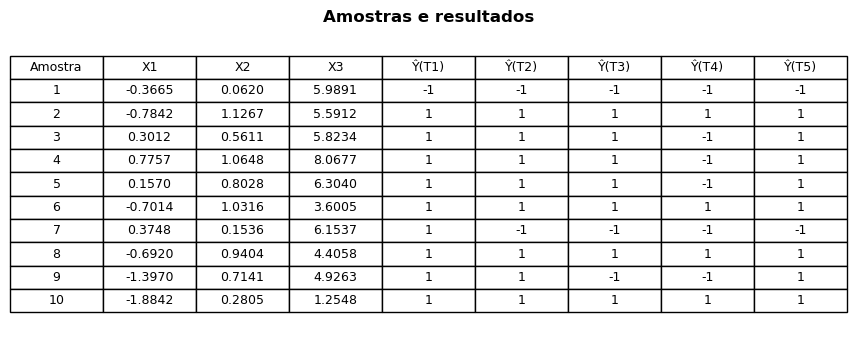

In [76]:
Xdados = x[:, :n_variaveis]

col_labels = ["Amostra", "X1", "X2", "X3"] + [f"Ŷ(T{i + 1})" for i in range(ŷ_list.shape[0])]

table_data = []
for i in range(x.shape[0]):
    linha = [
        i + 1,
        f"{Xdados[i, 0]:.4f}",
        f"{Xdados[i, 1]:.4f}",
        f"{Xdados[i ,2]:.4f}",
    ]
    linha += [int(ŷ_list[j, i]) for j in range(ŷ_list.shape[0])]
    table_data.append(linha)

fig, ax = plt.subplots(figsize=(9, 4))
ax.axis('off')

table = ax.table(
    cellText=table_data,
    colLabels=col_labels,
    loc='center',
    cellLoc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.4)

plt.title("Amostras e resultados", fontsize=12, weight='bold')
plt.show()

## Perguntas

**5)** Qual o efeito de aumentar ou diminuir o número de épocas na qualidade dos resultados?

**Resposta:** Aumentar o número de épocas tende a melhor o resutado, porém, essa melhora tende a desacelar com o número de épocas, eventualmente chegando em um ponto de ganhos imperceptíveis (provavelmente um gráfico qualidade x épocas teriam algo como uma progressão logarítmica).

**6)** Qual o efeito de aumentar ou diminuir a taxa de aprendizagem na qualidade dos resultados?

**Resposta:** Taxas de aprendizagem mais elevadas tendem a inicialmente aumentar a qualidade dos resultados mais rapidamente, porém, sua limitação está no "ajuste fino", é muito difícil para uma alta taxa de apredizagem, no longo prazo, ser tão precisa quanto uma com uma baixa taxa de aprendizagem. O inverso vale para taxa de aprendizagem mais baixas.

**7)** Discorra se é possível afirmar se as suas classes, neste problema, são linearmente separáveis.

**Resposta:** Não, pois não é possível traçar uma linha no plano que separe em dois espaços os resultados, como consequência as classificações tendem a serem imprecisas.
